## Loading the dependencies

In [7]:
!pip install kaggle

In [8]:
import json, requests

base_url = 'https://www.instabase.com/api/v1/drives'
root = '/chetan/kaggle-projs/fs/Instabase Drive'
url = base_url + root + '/kaggle.json'

token = 'YtuUKlkRWBgDN1SEdR2wqCItj7nctK'
api_args = dict(
  type='file',
  get_content=True,
)

headers = {
  'Authorization': 'Bearer {0}'.format(token),
  'Instabase-API-Args': json.dumps(api_args),
}
r_encoded = requests.get(url, headers=headers)
try:
    r = r_encoded.json()
except:
    print(r_encoded.headers)
    

In [13]:
!sudo ls /root

In [18]:
import os, logging
try:
    os.mkdir('/home/jovyan/.kaggle')
except:
    logging.exception("Creating .kaggle folder failed")
    pass
    
with open('/home/jovyan/.kaggle/kaggle.json', 'wt') as f:
    f.write(r_encoded.content.decode('utf-8'))
    
!chmod 600 /home/jovyan/.kaggle/kaggle.json
!kaggle

ERROR:root:Creating .kaggle folder failed
Traceback (most recent call last):
  File "<ipython-input-18-8ba095ba5dec>", line 3, in <module>
    os.mkdir('/home/jovyan/.kaggle')
FileExistsError: [Errno 17] File exists: '/home/jovyan/.kaggle'


chmod: cannot access '/home/jovyan/.kaggle/kaggle.json': No such file or directory
usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: the following arguments are required: command


## Downloading the dataset

In [19]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0%|                                               | 0.00/31.2k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 31.2k/31.2k [00:00<00:00, 3.31MB/s]
  0%|                                                | 0.00/441k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 441k/441k [00:00<00:00, 6.93MB/s]
  0%|                                                | 0.00/450k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 450k/450k [00:00<00:00, 9.63MB/s]
  0%|                                               | 0.00/13.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 13.1k/13.1k [00:00<00:00, 4.12MB/s]


In [25]:
!mv data_description.txt /workingdir/data/data_description.txt
!mv test.csv /workingdir/data/test.csv
!mv train.csv /workingdir/data/train.csv
!mv sample_submission.csv /workingdir/data/sample_submission.csv

In [20]:
!cat /depot/data_description.txt

cat: /depot/data_description.txt: No such file or directory


# EDA

In [27]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(15.7,11.27)})
df = pd.read_csv('../data/train.csv')

### Categoricals

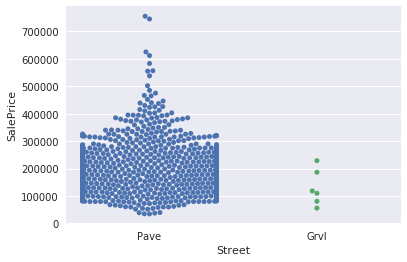

           Pave     Grvl
Street  0.99589  0.00411


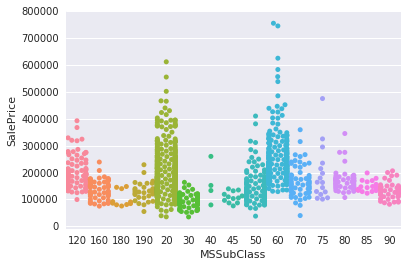

                  20        60       50       120       30       160  \
MSSubClass  0.367123  0.204795  0.09863  0.059589  0.04726  0.043151   

                  70        80        90       190        85        75  \
MSSubClass  0.041096  0.039726  0.035616  0.020548  0.013699  0.010959   

                  45       180       40  
MSSubClass  0.008219  0.006849  0.00274  


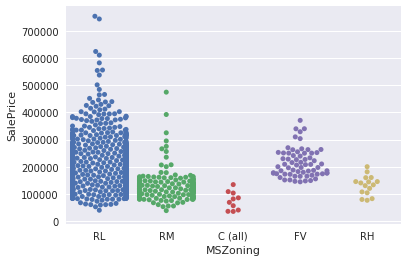

                RL        RM        FV        RH   C (all)
MSZoning  0.788356  0.149315  0.044521  0.010959  0.006849


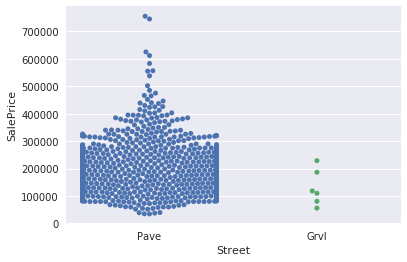

           Pave     Grvl
Street  0.99589  0.00411


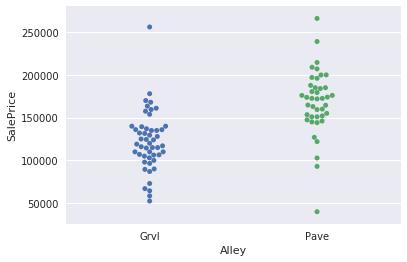

            NaN      Grvl      Pave
Alley  0.937671  0.034247  0.028082


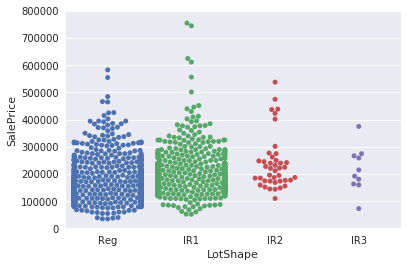

               Reg       IR1       IR2       IR3
LotShape  0.633562  0.331507  0.028082  0.006849


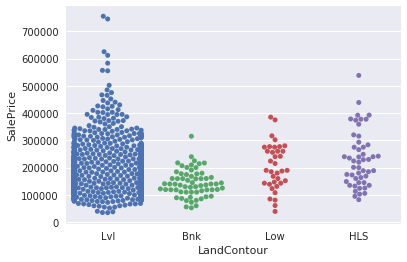

                  Lvl       Bnk       HLS       Low
LandContour  0.897945  0.043151  0.034247  0.024658


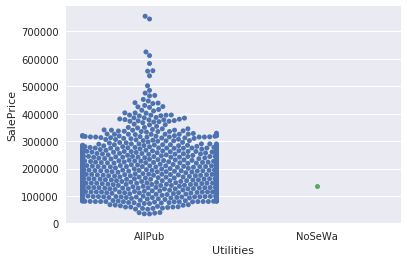

             AllPub    NoSeWa
Utilities  0.999315  0.000685


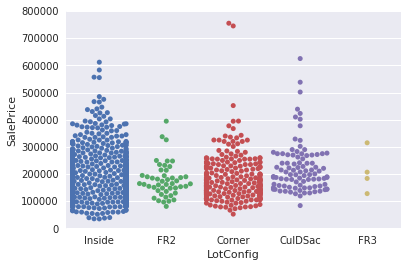

             Inside    Corner   CulDSac       FR2      FR3
LotConfig  0.720548  0.180137  0.064384  0.032192  0.00274


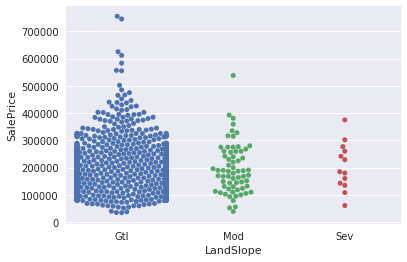

                Gtl       Mod       Sev
LandSlope  0.946575  0.044521  0.008904


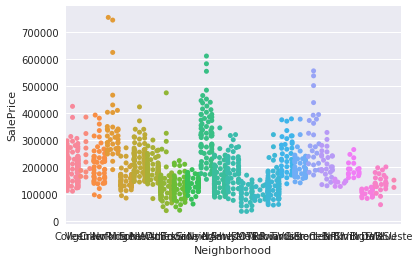

                NAmes  CollgCr   OldTown   Edwards   Somerst  Gilbert  \
Neighborhood  0.15411  0.10274  0.077397  0.068493  0.058904  0.05411   

              NridgHt    Sawyer  NWAmes   SawyerW   ...       IDOTRR  \
Neighborhood  0.05274  0.050685    0.05  0.040411   ...     0.025342   

               ClearCr     SWISU   StoneBr   MeadowV   Blmngtn    BrDale  \
Neighborhood  0.019178  0.017123  0.017123  0.011644  0.011644  0.010959   

               Veenker   NPkVill  Blueste  
Neighborhood  0.007534  0.006164  0.00137  

[1 rows x 25 columns]


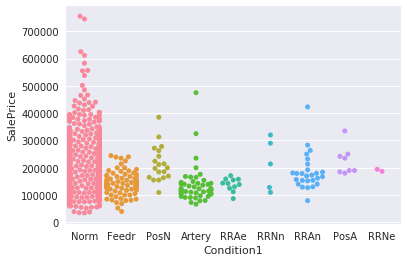

                Norm     Feedr    Artery      RRAn      PosN      RRAe  \
Condition1  0.863014  0.055479  0.032877  0.017808  0.013014  0.007534   

                PosA      RRNn     RRNe  
Condition1  0.005479  0.003425  0.00137  


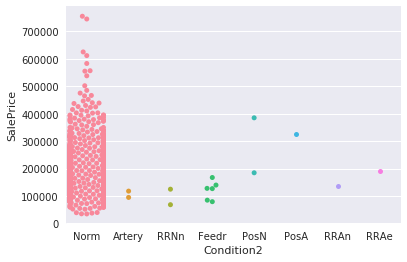

                Norm    Feedr     RRNn     PosN   Artery      PosA      RRAe  \
Condition2  0.989726  0.00411  0.00137  0.00137  0.00137  0.000685  0.000685   

                RRAn  
Condition2  0.000685  


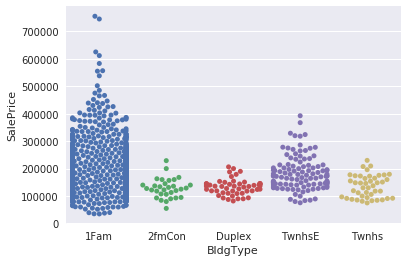

              1Fam    TwnhsE    Duplex     Twnhs    2fmCon
BldgType  0.835616  0.078082  0.035616  0.029452  0.021233


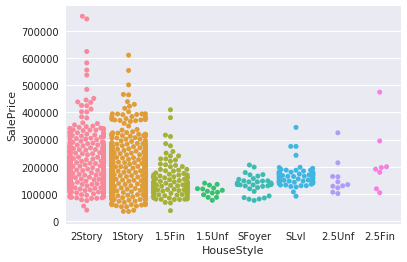

             1Story    2Story    1.5Fin      SLvl    SFoyer    1.5Unf  \
HouseStyle  0.49726  0.304795  0.105479  0.044521  0.025342  0.009589   

              2.5Unf    2.5Fin  
HouseStyle  0.007534  0.005479  


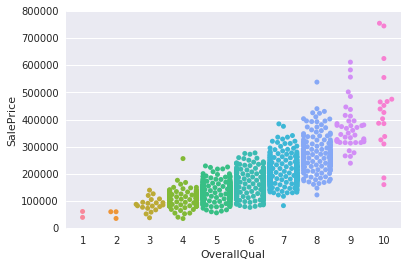

                   5         6         7         8         4         9   \
OverallQual  0.271918  0.256164  0.218493  0.115068  0.079452  0.029452   

                   3         10        2        1   
OverallQual  0.013699  0.012329  0.002055  0.00137  


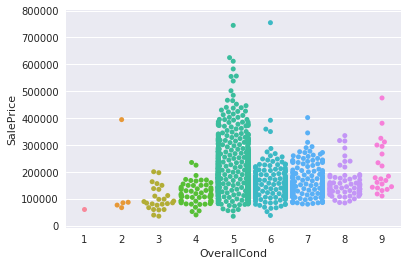

                    5         6         7         8         4         3  \
OverallCond  0.562329  0.172603  0.140411  0.049315  0.039041  0.017123   

                    9         2         1  
OverallCond  0.015068  0.003425  0.000685  


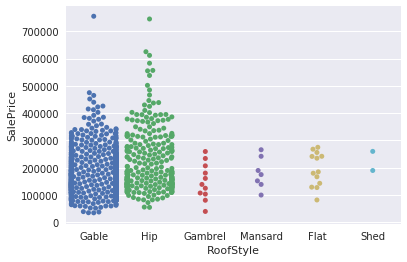

              Gable      Hip      Flat   Gambrel   Mansard     Shed
RoofStyle  0.781507  0.19589  0.008904  0.007534  0.004795  0.00137


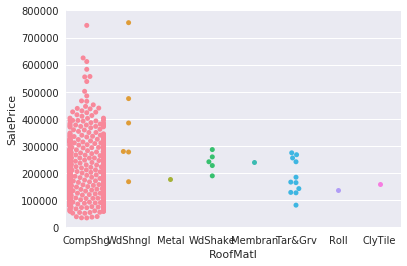

           CompShg   Tar&Grv  WdShngl   WdShake   Membran     Metal   ClyTile  \
RoofMatl  0.982192  0.007534  0.00411  0.003425  0.000685  0.000685  0.000685   

              Roll  
RoofMatl  0.000685  


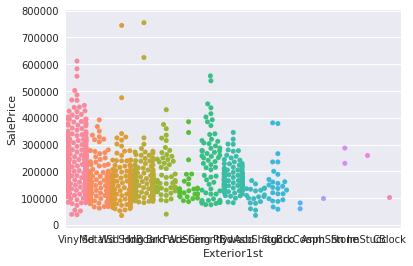

             VinylSd   HdBoard   MetalSd   Wd Sdng   Plywood   CemntBd  \
Exterior1st  0.35274  0.152055  0.150685  0.141096  0.073973  0.041781   

              BrkFace   WdShing    Stucco   AsbShng  BrkComm    Stone  \
Exterior1st  0.034247  0.017808  0.017123  0.013699  0.00137  0.00137   

              AsphShn   ImStucc    CBlock  
Exterior1st  0.000685  0.000685  0.000685  


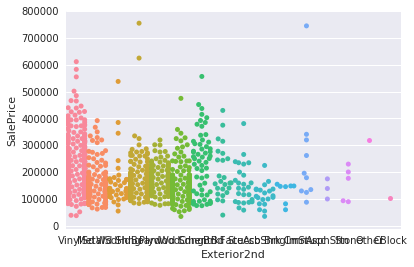

              VinylSd   MetalSd   HdBoard   Wd Sdng  Plywood   CmentBd  \
Exterior2nd  0.345205  0.146575  0.141781  0.134932  0.09726  0.041096   

              Wd Shng    Stucco   BrkFace   AsbShng   ImStucc   Brk Cmn  \
Exterior2nd  0.026027  0.017808  0.017123  0.013699  0.006849  0.004795   

                Stone   AsphShn    CBlock     Other  
Exterior2nd  0.003425  0.002055  0.000685  0.000685  


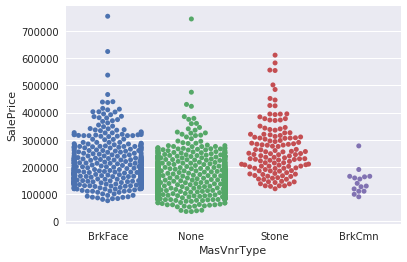

                None   BrkFace     Stone    BrkCmn       NaN
MasVnrType  0.591781  0.304795  0.087671  0.010274  0.005479


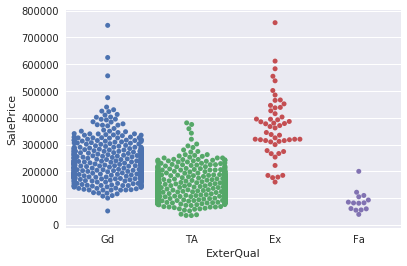

                 TA        Gd        Ex        Fa
ExterQual  0.620548  0.334247  0.035616  0.009589


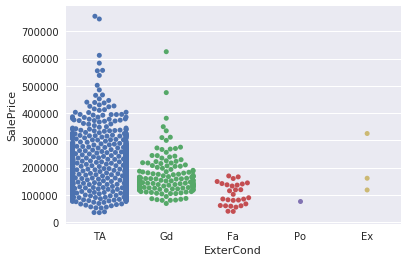

                 TA   Gd        Fa        Ex        Po
ExterCond  0.878082  0.1  0.019178  0.002055  0.000685


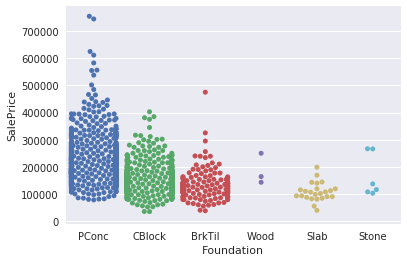

               PConc    CBlock  BrkTil      Slab    Stone      Wood
Foundation  0.443151  0.434247     0.1  0.016438  0.00411  0.002055


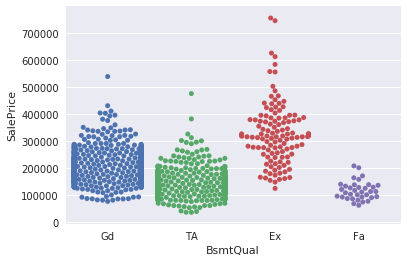

                TA        Gd        Ex       NaN        Fa
BsmtQual  0.444521  0.423288  0.082877  0.025342  0.023973


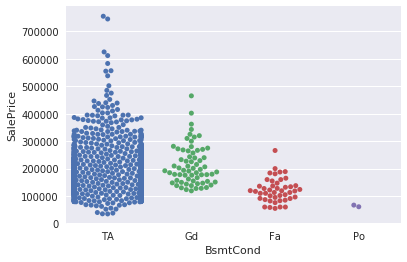

                TA        Gd        Fa       NaN       Po
BsmtCond  0.897945  0.044521  0.030822  0.025342  0.00137


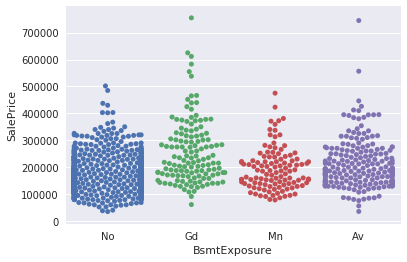

                   No       Av        Gd        Mn       NaN
BsmtExposure  0.65274  0.15137  0.091781  0.078082  0.026027


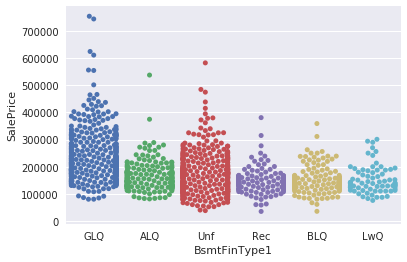

                   Unf       GLQ       ALQ      BLQ       Rec       LwQ  \
BsmtFinType1  0.294521  0.286301  0.150685  0.10137  0.091096  0.050685   

                   NaN  
BsmtFinType1  0.025342  


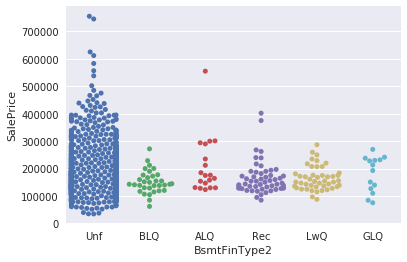

                   Unf       Rec       LwQ       NaN       BLQ       ALQ  \
BsmtFinType2  0.860274  0.036986  0.031507  0.026027  0.022603  0.013014   

                   GLQ  
BsmtFinType2  0.009589  


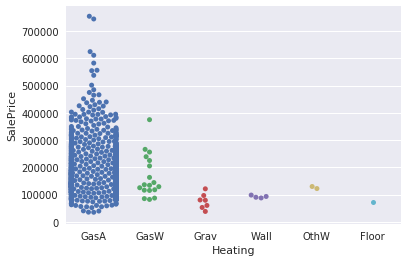

             GasA      GasW      Grav     Wall     OthW     Floor
Heating  0.978082  0.012329  0.004795  0.00274  0.00137  0.000685


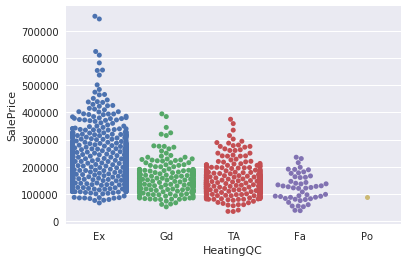

                 Ex        TA        Gd        Fa        Po
HeatingQC  0.507534  0.293151  0.165068  0.033562  0.000685


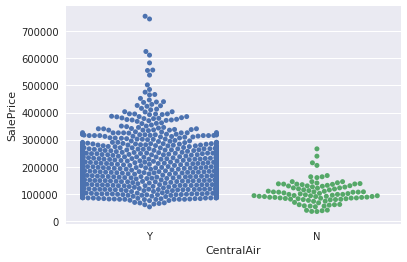

                   Y         N
CentralAir  0.934932  0.065068


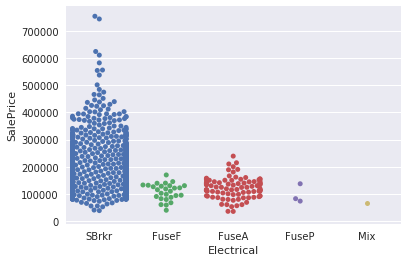

               SBrkr     FuseA     FuseF     FuseP       Mix       NaN
Electrical  0.913699  0.064384  0.018493  0.002055  0.000685  0.000685


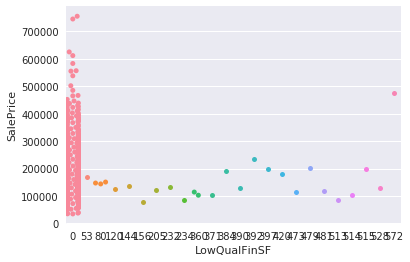

                   0         80       360       528       53        120  \
LowQualFinSF  0.982192  0.002055  0.00137  0.000685  0.000685  0.000685   

                   144       156       205       232    ...          392  \
LowQualFinSF  0.000685  0.000685  0.000685  0.000685    ...     0.000685   

                   397       420       473       479       481       513  \
LowQualFinSF  0.000685  0.000685  0.000685  0.000685  0.000685  0.000685   

                   514       515       384  
LowQualFinSF  0.000685  0.000685  0.000685  

[1 rows x 24 columns]


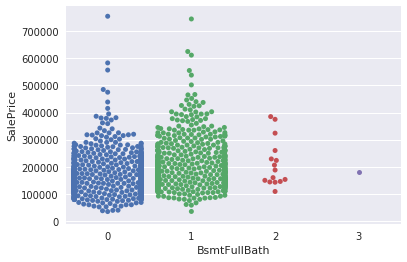

                     0        1         2         3
BsmtFullBath  0.586301  0.40274  0.010274  0.000685


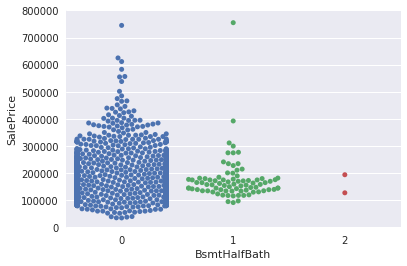

                     0         1        2
BsmtHalfBath  0.943836  0.054795  0.00137


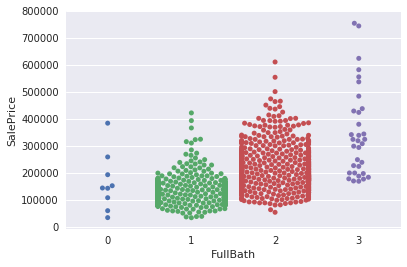

                 2         1         3         0
FullBath  0.526027  0.445205  0.022603  0.006164


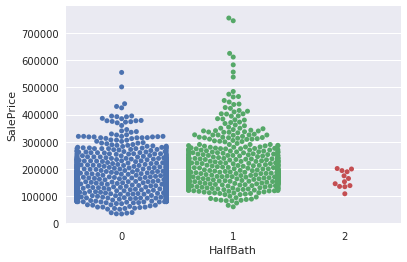

                 0         1         2
HalfBath  0.625342  0.366438  0.008219


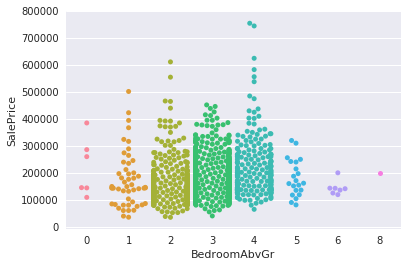

                     3         2        4         1         5         6  \
BedroomAbvGr  0.550685  0.245205  0.14589  0.034247  0.014384  0.004795   

                    0         8  
BedroomAbvGr  0.00411  0.000685  


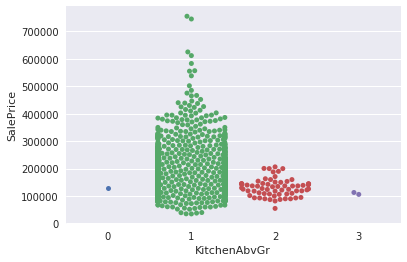

                     1         2        3         0
KitchenAbvGr  0.953425  0.044521  0.00137  0.000685


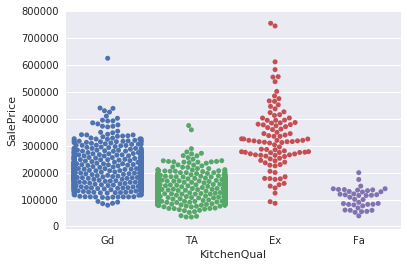

                   TA       Gd        Ex        Fa
KitchenQual  0.503425  0.40137  0.068493  0.026712


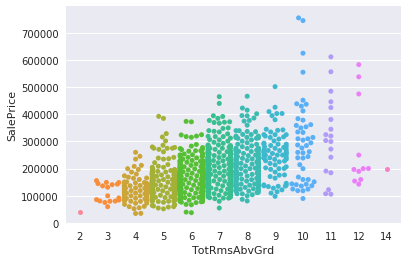

                    6         7         5         8         4        9   \
TotRmsAbvGrd  0.275342  0.225342  0.188356  0.128082  0.066438  0.05137   

                    10        11        3         12        14        2   
TotRmsAbvGrd  0.032192  0.012329  0.011644  0.007534  0.000685  0.000685  


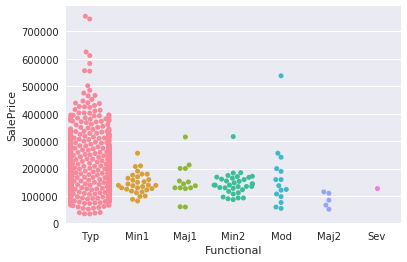

                 Typ      Min2      Min1       Mod      Maj1      Maj2  \
Functional  0.931507  0.023288  0.021233  0.010274  0.009589  0.003425   

                 Sev  
Functional  0.000685  


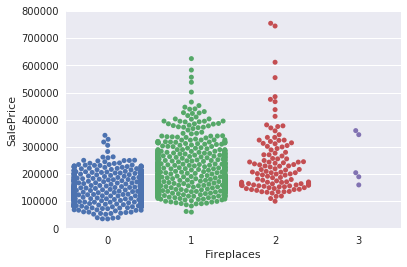

                   0         1         2         3
Fireplaces  0.472603  0.445205  0.078767  0.003425


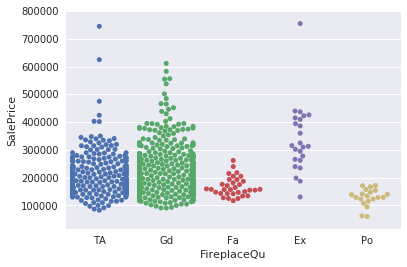

                  NaN        Gd        TA        Fa        Ex        Po
FireplaceQu  0.472603  0.260274  0.214384  0.022603  0.016438  0.013699


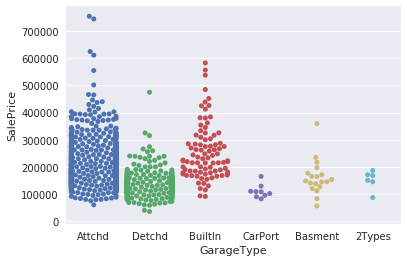

             Attchd    Detchd   BuiltIn       NaN   Basment   CarPort   2Types
GarageType  0.59589  0.265068  0.060274  0.055479  0.013014  0.006164  0.00411


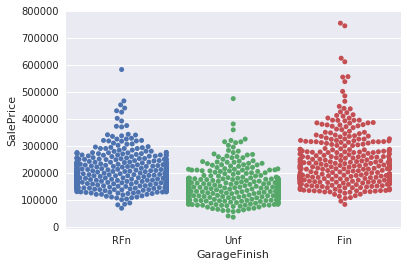

                   Unf       RFn       Fin       NaN
GarageFinish  0.414384  0.289041  0.241096  0.055479


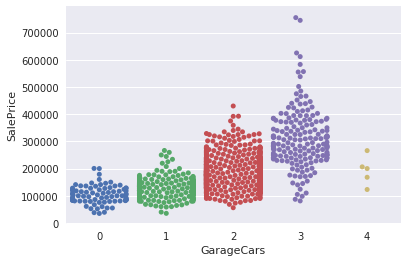

                   2        1         3         0         4
GarageCars  0.564384  0.25274  0.123973  0.055479  0.003425


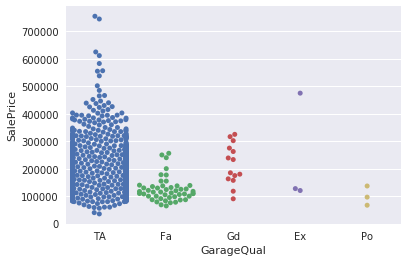

                  TA       NaN        Fa        Gd        Ex        Po
GarageQual  0.897945  0.055479  0.032877  0.009589  0.002055  0.002055


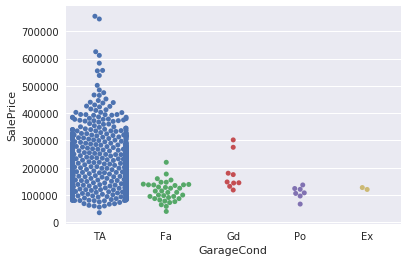

                  TA       NaN        Fa        Gd        Po       Ex
GarageCond  0.908219  0.055479  0.023973  0.006164  0.004795  0.00137


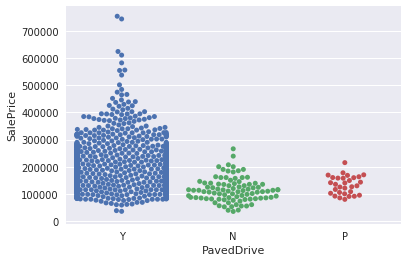

                   Y         N         P
PavedDrive  0.917808  0.061644  0.020548


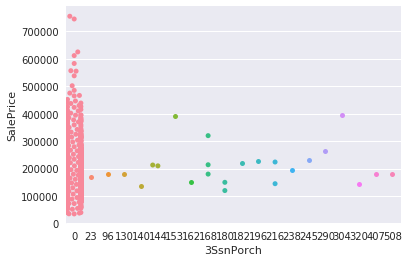

                0         168      216      144      180       245       238  \
3SsnPorch  0.983562  0.002055  0.00137  0.00137  0.00137  0.000685  0.000685   

                290       196       182       407       304       162  \
3SsnPorch  0.000685  0.000685  0.000685  0.000685  0.000685  0.000685   

                153       320       140       130       96        23   \
3SsnPorch  0.000685  0.000685  0.000685  0.000685  0.000685  0.000685   

                508  
3SsnPorch  0.000685  


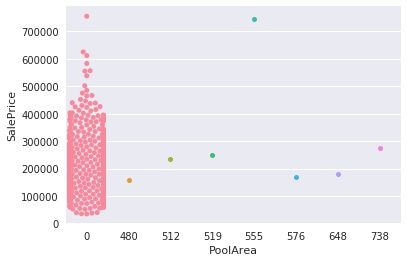

               0         738       648       576       555       519  \
PoolArea  0.995205  0.000685  0.000685  0.000685  0.000685  0.000685   

               512       480  
PoolArea  0.000685  0.000685  


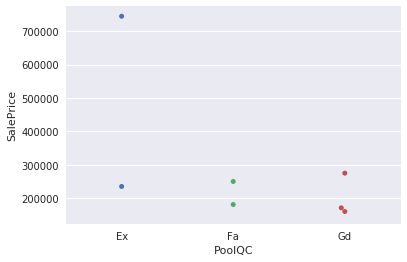

             NaN        Gd       Ex       Fa
PoolQC  0.995205  0.002055  0.00137  0.00137


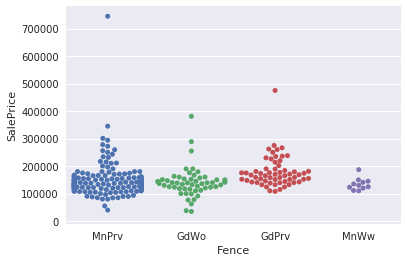

            NaN     MnPrv     GdPrv      GdWo      MnWw
Fence  0.807534  0.107534  0.040411  0.036986  0.007534


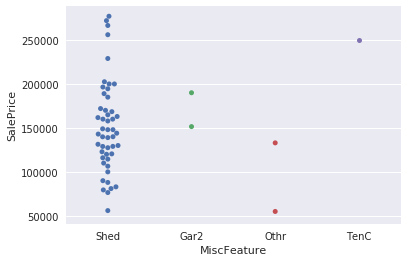

                  NaN      Shed     Othr     Gar2      TenC
MiscFeature  0.963014  0.033562  0.00137  0.00137  0.000685


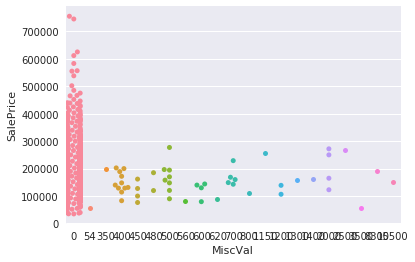

            0         400       500       700      450      2000     600    \
MiscVal  0.964384  0.007534  0.005479  0.003425  0.00274  0.00274  0.00274   

           1200     480       1150     ...        15500     620       3500   \
MiscVal  0.00137  0.00137  0.000685    ...     0.000685  0.000685  0.000685   

            560       2500      1300      1400      350       8300      54     
MiscVal  0.000685  0.000685  0.000685  0.000685  0.000685  0.000685  0.000685  

[1 rows x 21 columns]


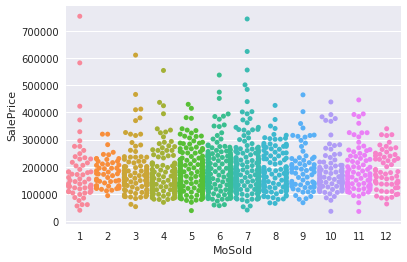

              6         7         5         4         8         3         10  \
MoSold  0.173288  0.160274  0.139726  0.096575  0.083562  0.072603  0.060959   

             11        9         12        1         2   
MoSold  0.05411  0.043151  0.040411  0.039726  0.035616  


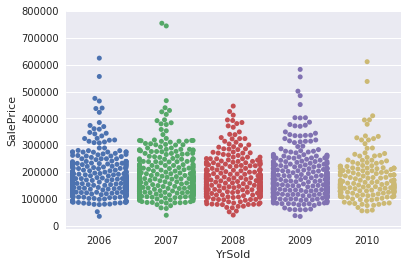

            2009      2007      2006      2008      2010
YrSold  0.231507  0.225342  0.215068  0.208219  0.119863


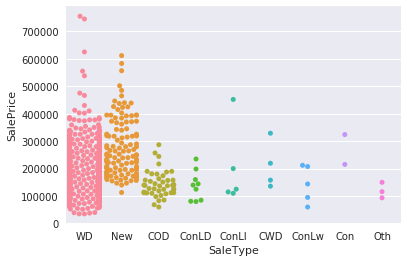

                WD       New       COD     ConLD     ConLI     ConLw      CWD  \
SaleType  0.867808  0.083562  0.029452  0.006164  0.003425  0.003425  0.00274   

               Oth      Con  
SaleType  0.002055  0.00137  


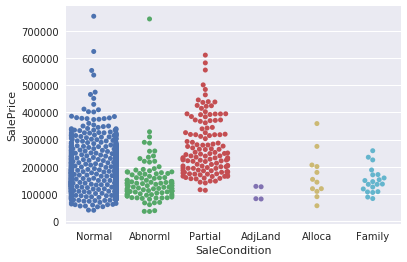

                 Normal   Partial   Abnorml    Family    Alloca  AdjLand
SaleCondition  0.820548  0.085616  0.069178  0.013699  0.008219  0.00274


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [23]:
def graph_categorical(df, colname):
    sns.swarmplot(x=colname, y='SalePrice', data=df)
    plt.show()
    print(df[colname].value_counts(dropna=False, normalize=True).to_frame().T)

len([graph_categorical(df, c) for c in df.columns if len(df[c].unique()) < 30])

### Quantitative

In [33]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_orig_rc_params',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'external',
 'factorplot',
 'get_dataset_names',
 'heatmap',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'lvplot',
 'matrix',
 'miscplot',
 'mpl',
 'mpl_palette',
 'pairplot',
 'palettes',
 'palplot',
 'plotting_context',
 'poin

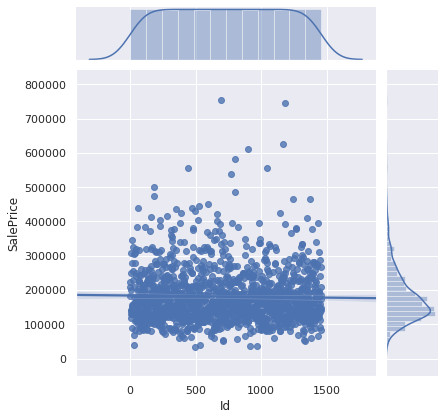

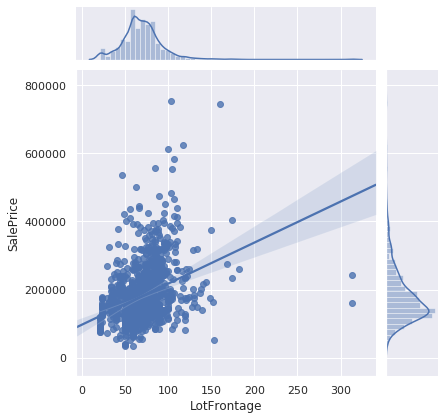

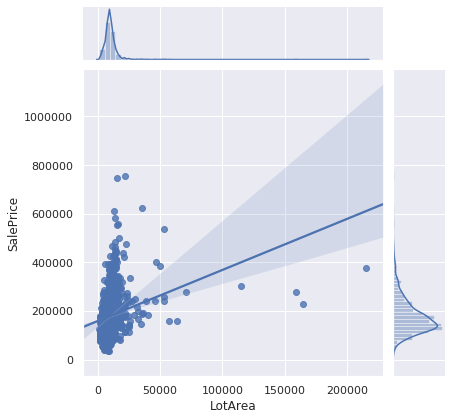

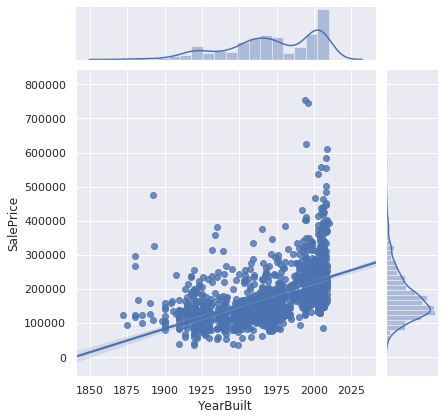

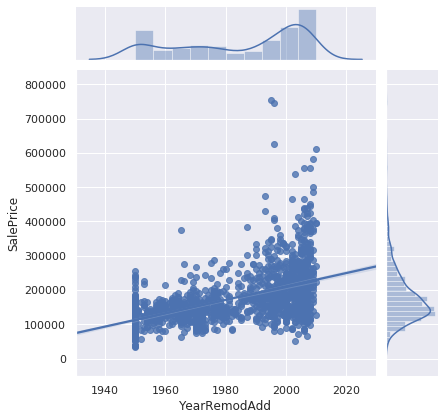

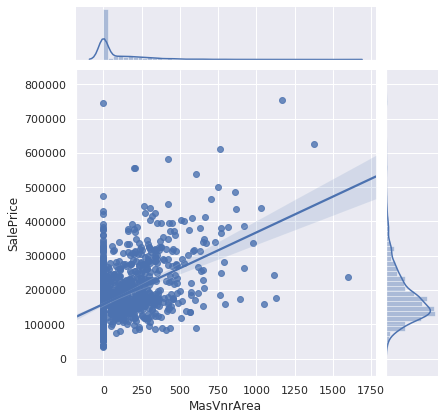

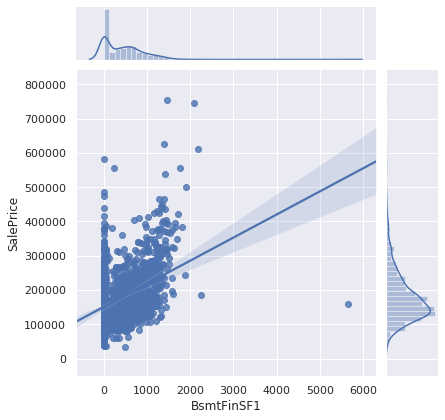

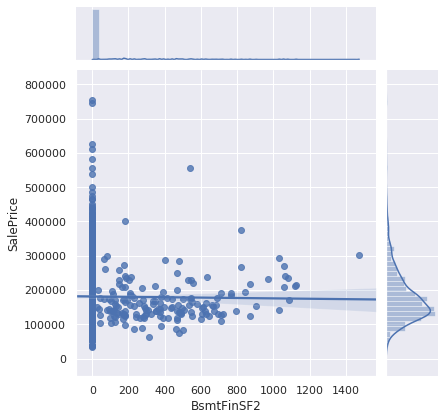

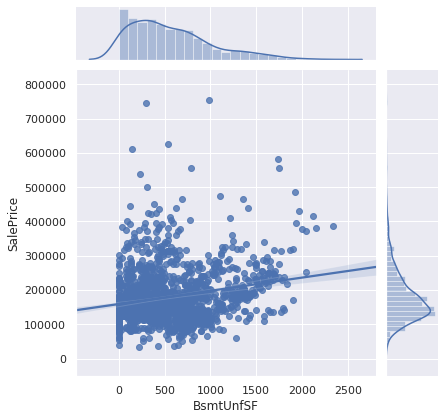

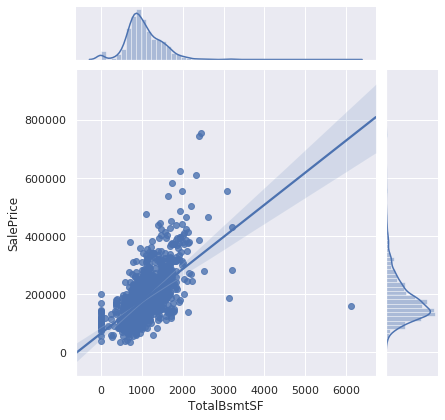

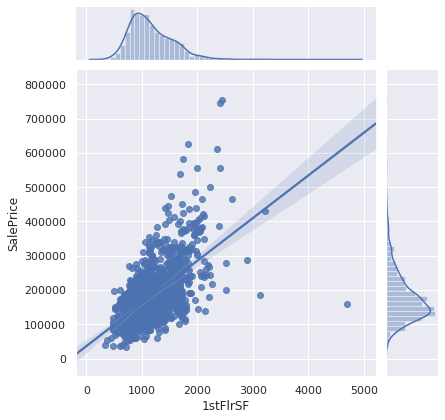

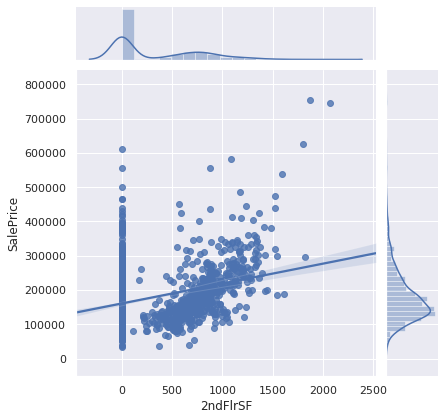

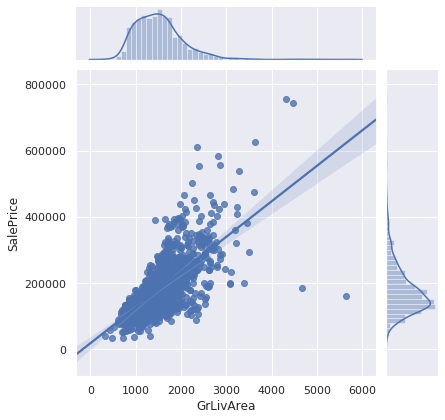

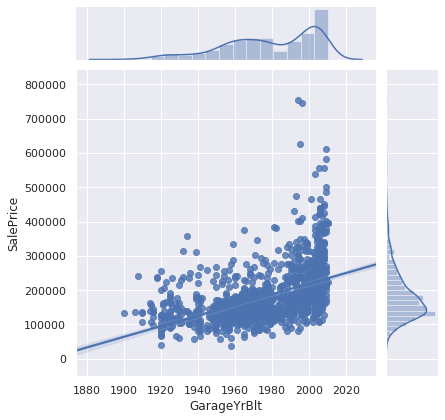

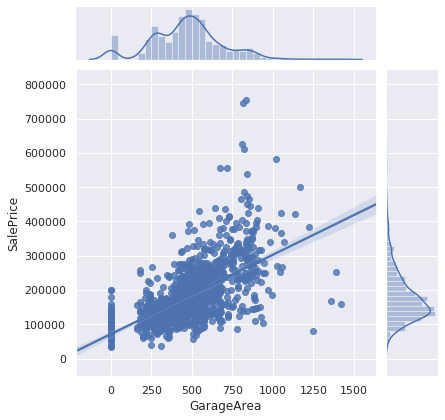

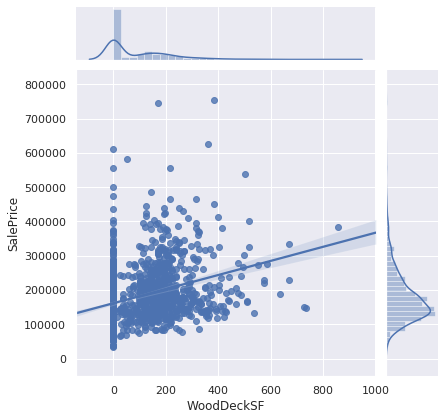

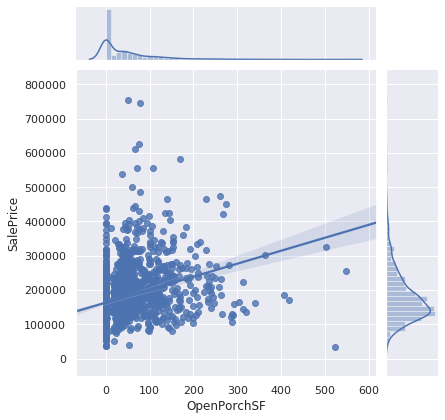

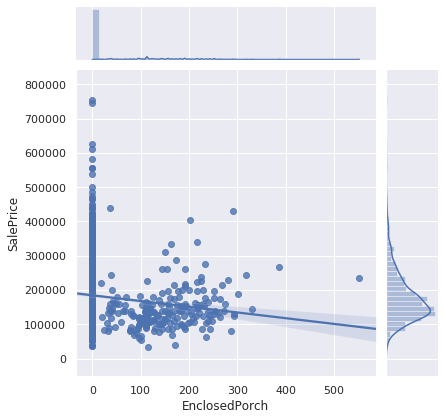

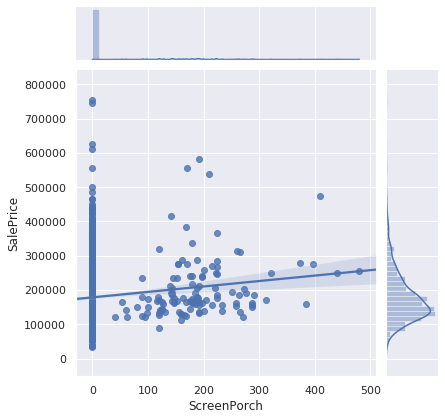

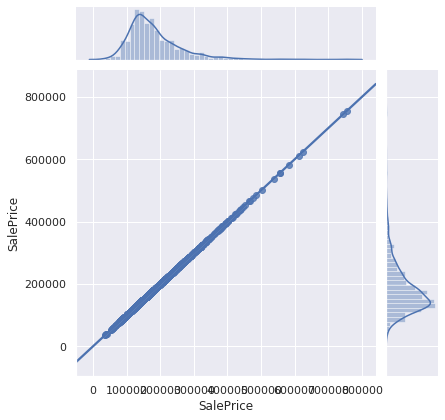

20

In [52]:
def graph_quantitative(df, colname):
    sns.jointplot(x=colname, y='SalePrice', data=df, kind='reg')
    plt.show()
    #print(df[colname].value_counts(dropna=False, normalize=True).to_frame().T)

len([graph_quantitative(df, c) for c in df.columns if len(df[c].unique()) > 30])